# Austin Animal Shelters, Worth a Chance

# Project Goals
- Discover drivers that influences a dog's outcome
- Utilize the drives in machine learning models to predict the outcome
- Obtain a deeper understanding of how drivers influence outcome to develop a next steps plan to improve upon the model

# Executive Summary

**Questions:**

    1. Does a dog's breed influence their chances at finding a new home?
    2. Does a dog's color influence their chances at finding a new home?
    3. Does their age influence their chances at finding a new home?
    4. Does their time in a shelter decrease their desirability to potential adoptive parents?
**Takeaways:**

    
    

# Imports

In [1]:
import pandas as pd
import numpy as np
import os
import env
import acquire as a
import prepare as p
import visual as viz
from sklearn.model_selection import train_test_split

#Stats imports & evaluations
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind
import math
from sklearn.metrics import accuracy_score

#visual imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# modeling method
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

# Acquire Data

- Data acquired from data.austintexas.gov. 
    - Intakes data set: 148,133 rows
    - Outcomes data set: 148,339 rows 
- Each row represents a dog
- Each column represents the dogs features and background information

In [2]:
# Acquire data sets
intakes = a.get_aac_intakes()
outcomes = a.get_aac_outcomes()

# Prepare

- Renamed columns to be user friendly.
- Merged intake and outcome data sets.
- Dropped nulls.
- Coverted date columns to datetime data types.
- Subset data set for dogs.
    - top 10 dog breeds
    - top 10 colors 
- Subset outcomes for: 
    - adoption
    - return to owner
    - euthanasia
    - died
- Dropped columns:
    - found location
    - outcome subtype
    - duplicated columns from merge: breed, animal type, color, monthyear
- Feature engineered new columns using existing data.
    - time in shelter
    - months in shelter
    - age in months upon outcome
    - age in years upon outcome
- Split data into three sets (56/24/20):
    - train
    - validate 
    - test 

In [3]:
# Normalize columns. Drop outcome_subtype and name.
intake_df, outcome_df = p.prep_aac(intakes, outcomes)
# Merge intake and outcome data sets
combined = p.combined_df(intake_df, outcome_df)
# Covert date columns to datetime type. Subset for dogs. Top 10 breeds. Top 10 colors.
combined_dog = p.prep_combined(combined)
# Feature engineered columns. 
combined_dog = p.feature_eng(combined_dog)
# Split data 56/24/20. Dogs
train, val, test= p.split_data(combined_dog,target='outcome_type')

# Data Dictionary

| Feature | Definition |
| :-- | :-- |
| animal_id | uniqe identifier for animal |
| date_intake | date of intake |
| intake_type | method in which animal was obtained |
| intake_condition | condition/reason for animal intake | 
| animal_type | type of animal |
| age_upon_intake | age of animal when obtained |
| date_outcome | date of outcome |
| date_of_birth | birth date |
| outcome_type | outcome of animal:<br> - adoption<br> - return to owner<br> - euthanasia<br> - died |
| sex_upon_outcome | sex of animal: <br> - intact<br> - neutered<br> - spayed|
| age_upon_outcome |age when outcome reached |
| breed | breed of animal |
| color | color(s) of animal |
| time_in_shelter | time spent in shelter in days |
| months_in_shelter | time spent in shelter in months |
| age_months_outcome | age of animal in months when outcome reached |
| age_years_outcome | age of animal in years when outcome reached |


# Glance into the Data

In [4]:
# dataframe
train.head()

,animal_id,date_intake,intake_type,intake_condition,animal_type,age_upon_intake,date_outcome,date_of_birth,outcome_type,sex_upon_outcome,age_upon_outcome,breed,color,time_in_shelter,months_in_shelter,age_months_outcome,age_years_outcome
182150,A796587,2019-06-03 12:24:00,Stray,Normal,Dog,1 year,2019-06-12 04:59:00,2018-06-03,Adoption,Neutered Male,1 year,Pit Bull,Blue/White,8,< 30 days,12.0,1 year
136196,A808871,2019-11-15 12:12:00,Stray,Normal,Dog,3 months,2019-11-19 05:10:00,2019-08-15,Adoption,Neutered Male,3 months,Chihuahua,Tan/White,3,< 30 days,3.0,1 year
103436,A847525,2021-12-03 12:31:00,Stray,Normal,Dog,2 months,2021-12-08 05:56:00,2021-09-12,Adoption,Spayed Female,2 months,Pit Bull,Tan,4,< 30 days,3.0,1 year
16445,A861991,2022-07-20 02:54:00,Owner Surrender,Normal,Dog,5 months,2022-08-16 06:42:00,2022-01-20,Adoption,Spayed Female,6 months,Pit Bull,Brown/White,27,< 30 days,7.0,1 year
81183,A718254,2015-12-26 11:54:00,Stray,Normal,Dog,1 year,2015-12-28 06:34:00,2014-12-26,Return to Owner,Neutered Male,1 year,Labrador Retriever,Black,1,< 30 days,12.0,1 year


# Explore

**Questions:**

    1. Does a dog's breed influence their chances at finding a new home?
    2. Does a dog's color influence their chances at finding a new home?
    3. Does their age influence their chances at finding a new home?
    4. Does their time in a shelter decrease their desirability to potential adoptive parents?

## Overall Outcomes

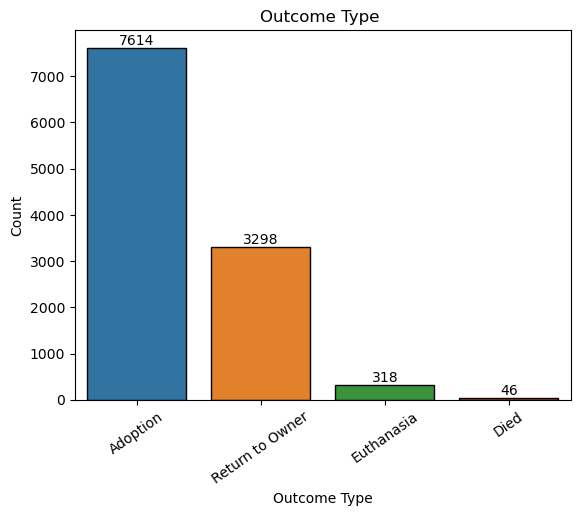

In [5]:
# Graph of outcomes
viz.overall_outcome(train)

# Q1. Does a dog's breed influence their chances at finding a new home?

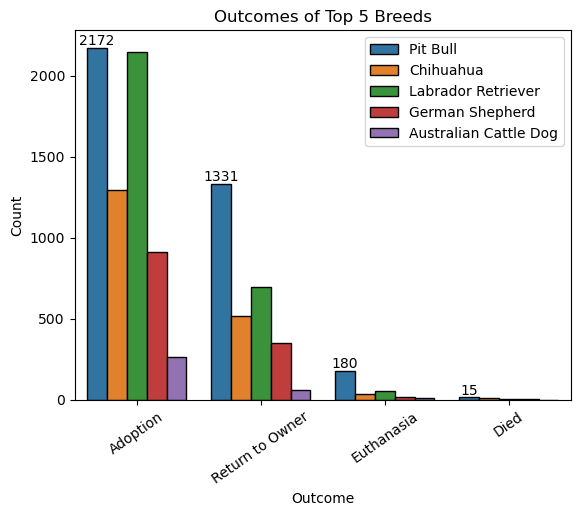

In [6]:
viz.breed_plot(train)

<div class="alert alert-block alert-info">
Takeaways:
    


### Statistic Test

In [7]:
# Spearman's R Test
viz.spearmanr(train,'breed','outcome_type')

Results
--------
Correlation: 0.0924
P-value: 8.66330080572707e-23


## Q2. Does a dog's color influence their chances at finding a new home?

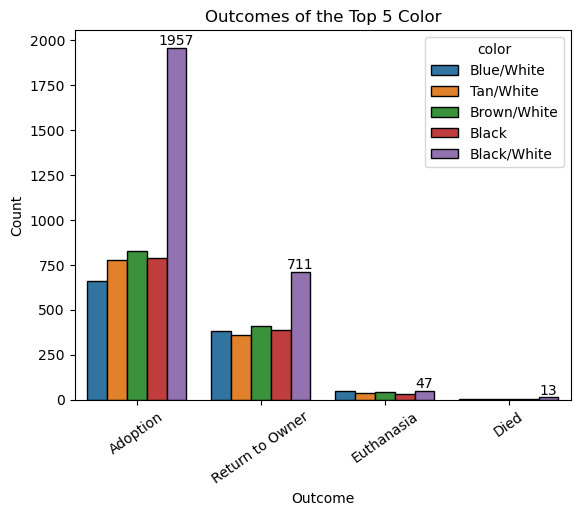

In [8]:
viz.color_plot(train)

<div class="alert alert-block alert-info">
Takeaways:
    

### Statistic Test

In [9]:
viz.spearmanr(train,'color','outcome_type')

Results
--------
Correlation: 0.0102
P-value: 0.2767904549358553


## Q3. Does their age influence their chances at finding a new home?

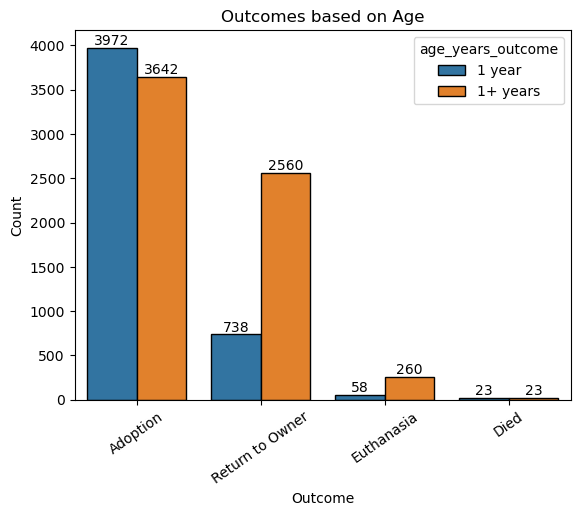

In [10]:
viz.age_plot(train)

<div class="alert alert-block alert-info">
Takeaways:
    

### Statistic Test

In [11]:
viz.spearmanr(train,'age_upon_outcome','outcome_type')

Results
--------
Correlation: 0.1167
P-value: 1.6533703888028805e-35


## Q4. Does their time in a shelter decrease their desirability to potential adoptive parents?

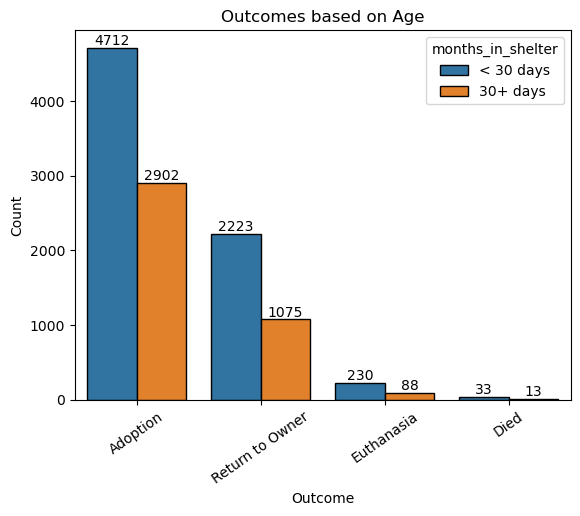

In [12]:
viz.time_plot(train)

<div class="alert alert-block alert-info">
Takeaways:
    

### Statistic Test

In [13]:
viz.ttest1samp(train)

Results
--------
Test statistic: -7.75
P-value: 1.0253773659701435e-14


# Exploration Summary

<div class="alert alert-block alert-success">
Takeaways:
    

# Modeling

Four models: Decision Tree, Random Forest, K Nearest Neighbor, Logistic Regression.

**Baseline: 67%**

In [14]:
# Create X and y trains
X_train, y_train, X_val, y_val, X_test, y_test = p.trains(train, val, test)
# Scale data
X_train, X_val, X_test = p.get_scaled(X_train, X_val, X_test)

## Decision Tree

In [15]:
# Decistion Tree
dec_tree = viz.dec_tree(X_train, y_train, X_val, y_val)

Results
---------
Train Accuracy: 0.7805
Validate Accuracy: 0.7761
Difference: 0.0044


## Random Forest

In [16]:
# Random Forest
rand_forest = viz.rand_forest(X_train, y_train, X_val, y_val)

Results
---------
Train Accuracy: 0.7772
Validate Accuracy: 0.7765
Difference: 0.0007


## Logistic Regression

In [17]:
# Logistic Regression
log_reg = viz.log_reg(X_train, y_train, X_val, y_val)

Results
---------
Train Accuracy: 0.7323
Validate Accuracy: 0.7321
Difference: 0.0002


## K Nearest Neighbor

In [18]:
knn_df = viz.knn(X_train, y_train, X_val, y_val)

Results
---------
Train Accuracy: 0.7707
Validate Accuracy: 0.7486
Difference: 0.0221


## Model Summary

In [19]:
# Models Dataframe
df = viz.all_in_one(X_train, y_train, X_val, y_val)
df.sort_values('difference')

,model_type,train_accuracy,validate_accuracy,difference,baseline
2,Logistic Regression,0.732263,0.732050,0.000213,0.67
1,Random Forest,0.777226,0.776536,0.000690,0.67
0,Decision Tree,0.780507,0.776122,0.004385,0.67
3,KNN,0.770663,0.748603,0.022060,0.67


<div class="alert alert-block alert-success">
<b> All four models beat the baseline with Random Forest and Logistic Regression doing the best. Decision tree did quite well, but its difference is greater than the previous two. KNN by far did the worst.<b><br>
<br>
<b> Random Forest will be selected to move on to use the test data. Despite it having a larger difference between train and validate data sets, its accuracy is almost 5% higher than Logistic Regression.<b>

## Test Data Set

In [20]:
test_df = viz.test_model(X_train, y_train, X_val, y_val, X_test, y_test)
test_df

,Validate,Test,difference
0,0.779,0.7654,0.0136


<div class="alert alert-block alert-success">
<b> Not only did the model beat the baseline on the test data set, the difference from the validate data set was only 1.36%. <b>

# Conclusion

# Next Steps